In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [2]:
"""Task 1: Data Cleaning
Perform the necessary data cleaning steps to convert messy, unclean data into clean data.
"""
df=pd.read_csv("DS1_C9_S7_Project_AbsenteeismAtWork_Data.csv",delimiter=';')
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


In [3]:
print(f'Column names: \n{df.columns}')
print('\n----------------------------------------------------------------------------')
print(f'\nCount of non-null records:\n\n{df.count()}')
print('\n----------------------------------------------------------------------------')
print(f'Data types of Columns: \n\n{df.dtypes}')
print('\n----------------------------------------------------------------------------')
print(f'information of Columns: \n\n{df.info()}')
print('\n----------------------------------------------------------------------------')


Column names: 
Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

----------------------------------------------------------------------------

Count of non-null records:

ID                                 740
Reason for absence                 740
Month of absence                   740
Day of the week                    740
Seasons                            740
Transportation expense             740
Distance from Residence to Work    740
Service time                       740
Age                                740
Work load Average/day              740
Hit target                         740
Disciplinary failure        

In [4]:
#Missing Value Treatment

print(df.isnull().sum())
print('There is no missing values in the dataset')

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64
There is no missing values in the dataset


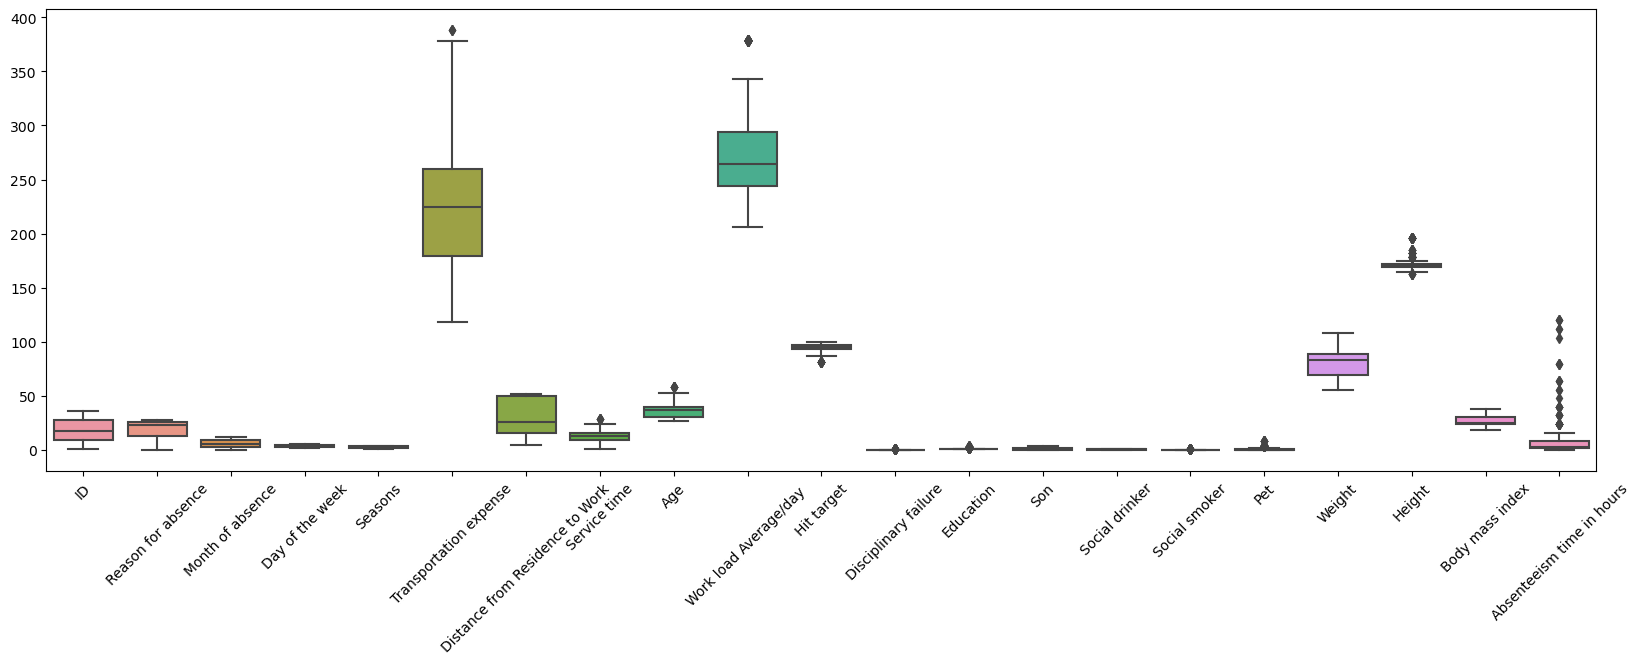

In [5]:
#Outlier Treatment
sns.boxplot(data= df)
plt.gcf().set_size_inches(20,6) 
plt.xticks(rotation= 45)

#Outlier Treatment- winsorization
def iqr_winsorization(df, threshold=1.5):
    df_out= df.copy() 
    columns_to_treat= df_out.columns
    for col in columns_to_treat: 
        q1=df_out[col].quantile(0.25) 
        q3=df_out [col].quantile(0.75) 
        iqr=q3-q1
        lf=q1-threshold*iqr 
        uf=q3+threshold*iqr
        df_out.loc[df_out [col]<lf, col]=lf
        df_out.loc [df_out [col] >uf, col]=uf
    return df_out

df=iqr_winsorization(df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'ID'),
  Text(1, 0, 'Reason for absence'),
  Text(2, 0, 'Month of absence'),
  Text(3, 0, 'Day of the week'),
  Text(4, 0, 'Seasons'),
  Text(5, 0, 'Transportation expense'),
  Text(6, 0, 'Distance from Residence to Work'),
  Text(7, 0, 'Service time'),
  Text(8, 0, 'Age'),
  Text(9, 0, 'Work load Average/day '),
  Text(10, 0, 'Hit target'),
  Text(11, 0, 'Disciplinary failure'),
  Text(12, 0, 'Education'),
  Text(13, 0, 'Son'),
  Text(14, 0, 'Social drinker'),
  Text(15, 0, 'Social smoker'),
  Text(16, 0, 'Pet'),
  Text(17, 0, 'Weight'),
  Text(18, 0, 'Height'),
  Text(19, 0, 'Body mass index'),
  Text(20, 0, 'Absenteeism time in hours')])

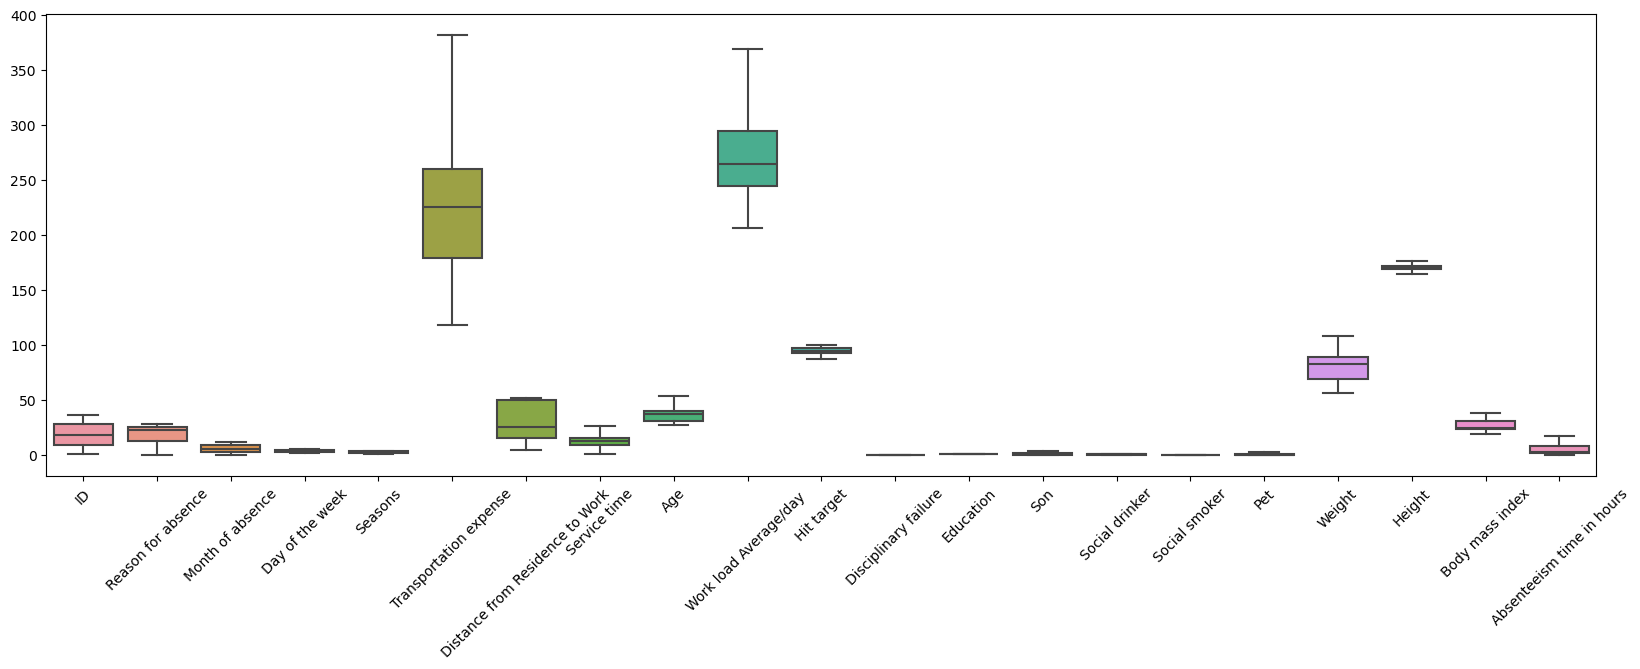

In [6]:
# After outlier Treatment
sns.boxplot(data= df)
plt.gcf().set_size_inches(20,6) 
plt.xticks(rotation= 45)

In [7]:
'''
Task - 2: Understanding Absenteeism Patterns
How does absenteeism vary across different employee demographics (age, education level, son, reason for absence etc.)
and work characteristics (disciplinary failure, hit target, etc.)?
Perform descriptive analysis to find the answer to the above question.
'''

'\nTask - 2: Understanding Absenteeism Patterns\nHow does absenteeism vary across different employee demographics (age, education level, son, reason for absence etc.)\nand work characteristics (disciplinary failure, hit target, etc.)?\nPerform descriptive analysis to find the answer to the above question.\n'


Renamed Column:
 | Reason for absence   | Average Absenteeism in Hours   |
|:---------------------|:-------------------------------|
| 2                    | 17                             |
| 9                    | 14.5                           |
| 19                   | 10.075                         |


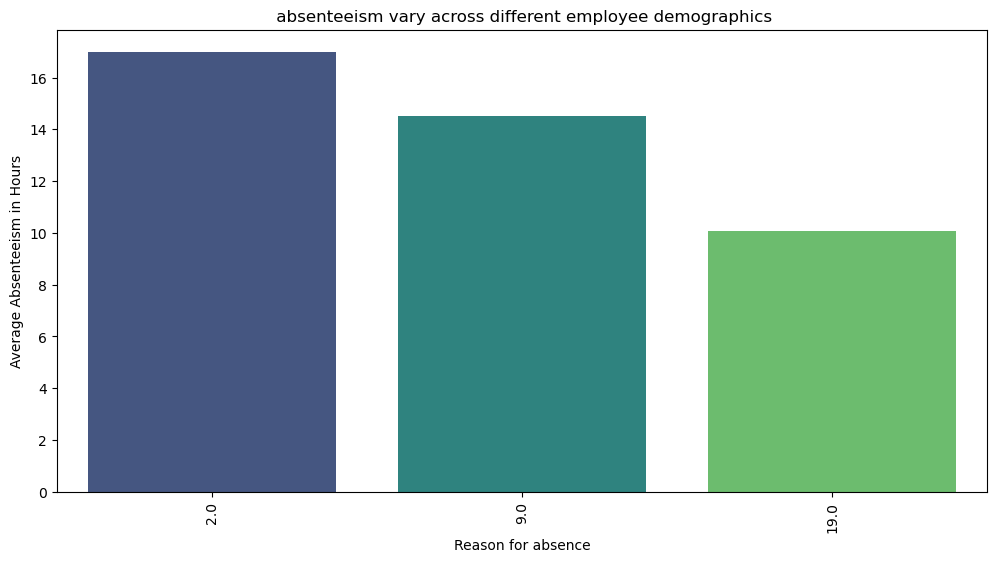


    Interpretation:
                    This charts shows how absenteeism vary across Reason for absence employee demographics
    

-----------------------------------------------------------------------------------------------


Renamed Column:
 | Age   | Average Absenteeism in Hours   |
|:------|:-------------------------------|
| 33    | 8.13725                        |
| 53.5  | 8                              |
| 46    | 8                              |


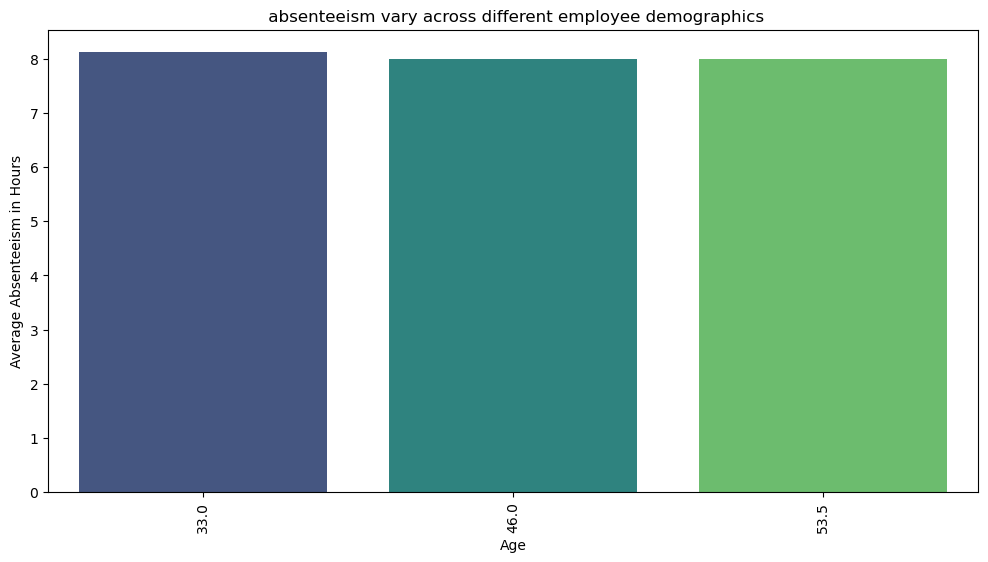


    Interpretation:
                    This charts shows how absenteeism vary across Age employee demographics
    

-----------------------------------------------------------------------------------------------


Renamed Column:
 | Son   | Average Absenteeism in Hours   |
|:------|:-------------------------------|
| 3     | 7.53333                        |
| 2     | 6.46795                        |
| 4     | 5.80952                        |


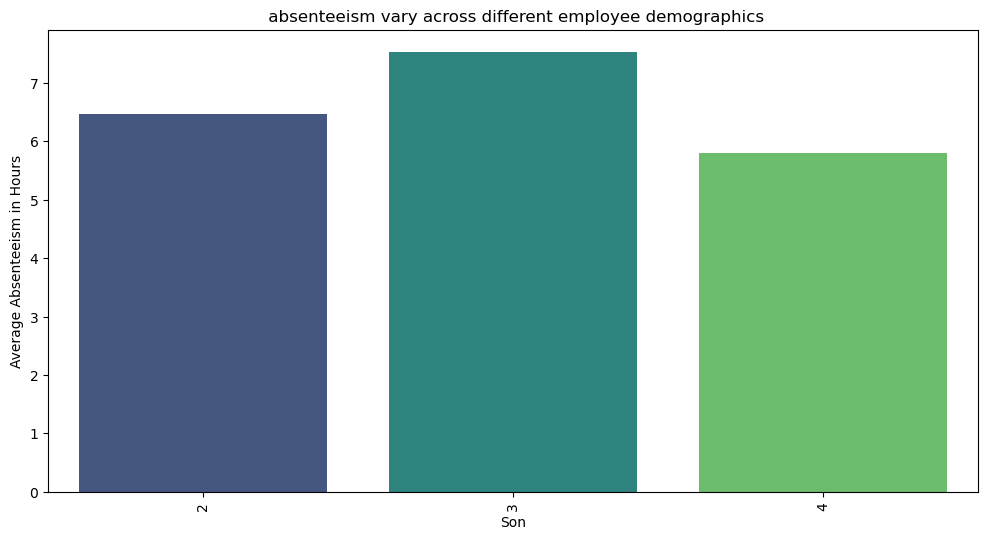


    Interpretation:
                    This charts shows how absenteeism vary across Son employee demographics
    

-----------------------------------------------------------------------------------------------


Renamed Column:
 | Weight   | Average Absenteeism in Hours   |
|:---------|:-------------------------------|
| 90       | 8.175                          |
| 95       | 7.82759                        |
| 70       | 7.53333                        |


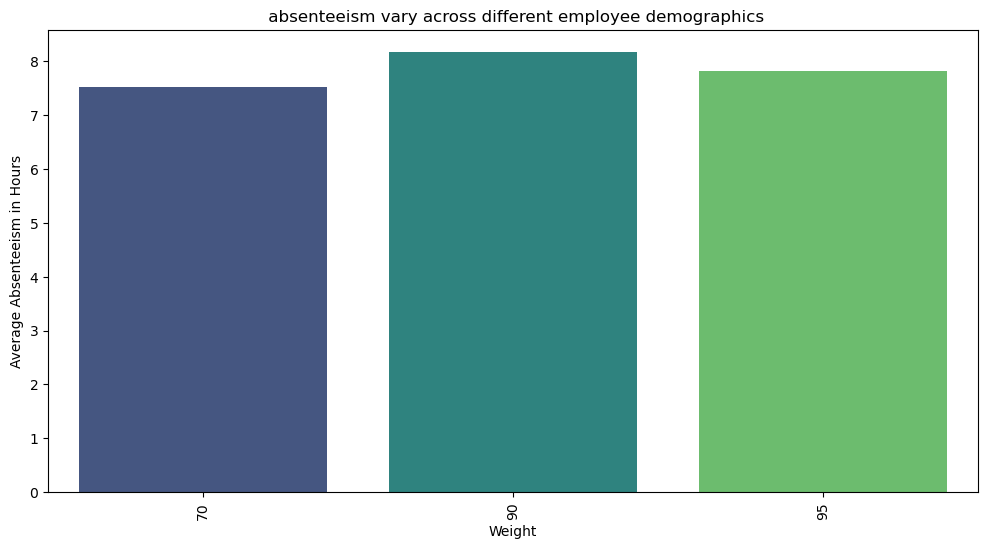


    Interpretation:
                    This charts shows how absenteeism vary across Weight employee demographics
    

-----------------------------------------------------------------------------------------------


Renamed Column:
 | Height   | Average Absenteeism in Hours   |
|:---------|:-------------------------------|
| 175      | 6.5                            |
| 172      | 6.02581                        |
| 167      | 5.97059                        |


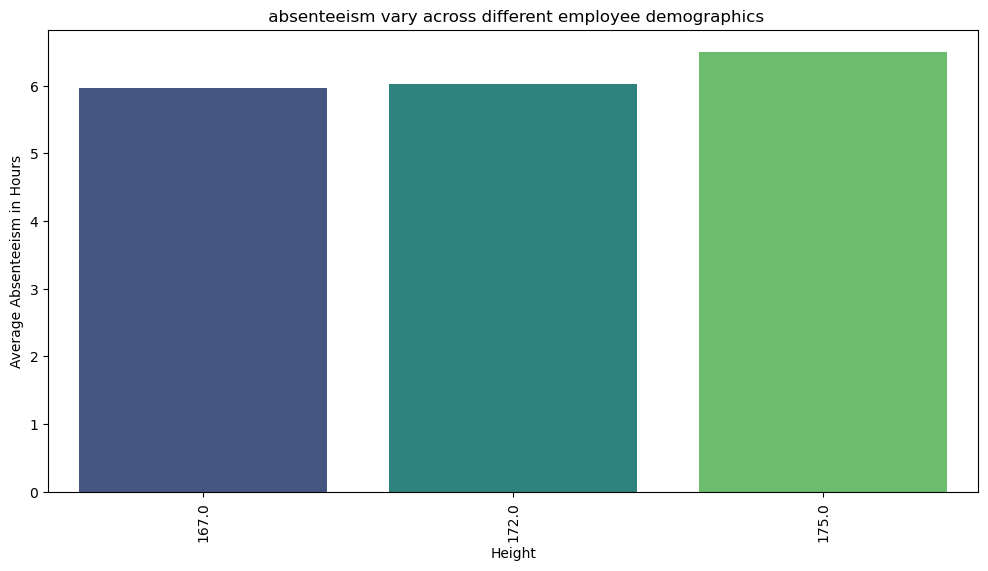


    Interpretation:
                    This charts shows how absenteeism vary across Height employee demographics
    

-----------------------------------------------------------------------------------------------


Renamed Column:
 | Body mass index   | Average Absenteeism in Hours   |
|:------------------|:-------------------------------|
| 30                | 8.175                          |
| 27                | 6.79167                        |
| 25                | 6.36508                        |


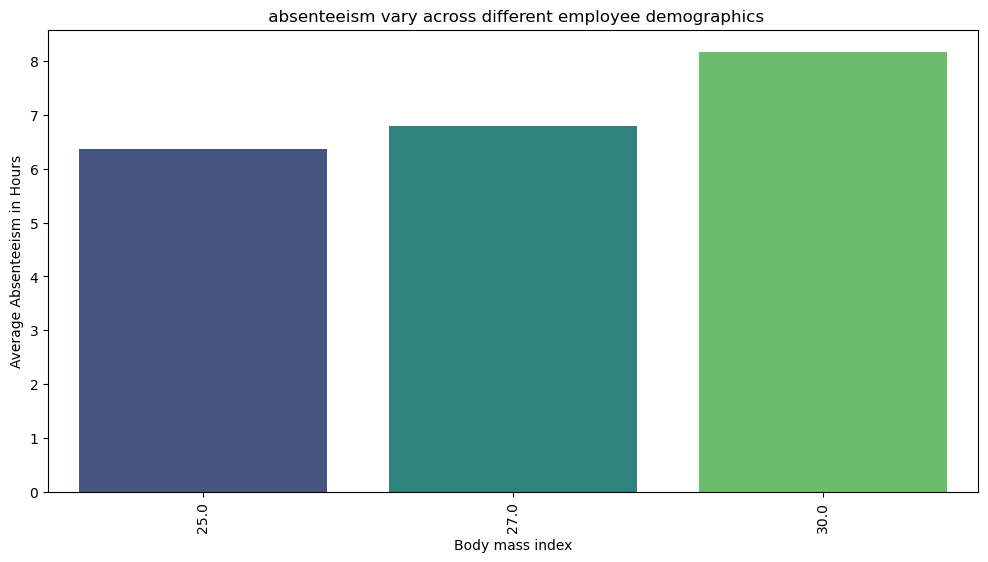


    Interpretation:
                    This charts shows how absenteeism vary across Body mass index employee demographics
    

-----------------------------------------------------------------------------------------------



In [8]:
t2=['Reason for absence','Age', 'Son','Weight', 'Height', 'Body mass index']
for i in t2:
    absenteeism=(df.groupby(i)['Absenteeism time in hours'].mean()).sort_values(ascending=False)
    absenteeism_=absenteeism.head(3)
    _absenteeism_ = absenteeism_.rename('Average Absenteeism in Hours')
    print("\nRenamed Column:\n", _absenteeism_.to_markdown(numalign="left", stralign="left"))
    z=pd.DataFrame(_absenteeism_ )
    plt.figure(figsize=(12, 6))
    sns.barplot(x=z.index, y=z['Average Absenteeism in Hours'], palette='viridis')
    plt.xlabel(i)
    plt.ylabel('Average Absenteeism in Hours')
    plt.title(' absenteeism vary across different employee demographics')
    plt.xticks(rotation=90)
    plt.show()
    print(f'''
    Interpretation:
                    This charts shows how absenteeism vary across {i} employee demographics
    ''')
    print('\n-----------------------------------------------------------------------------------------------\n')


Renamed Column:
 | Disciplinary failure   | frequency of Disciplinary failure   |
|:-----------------------|:------------------------------------|
| 0                      | 740                                 |


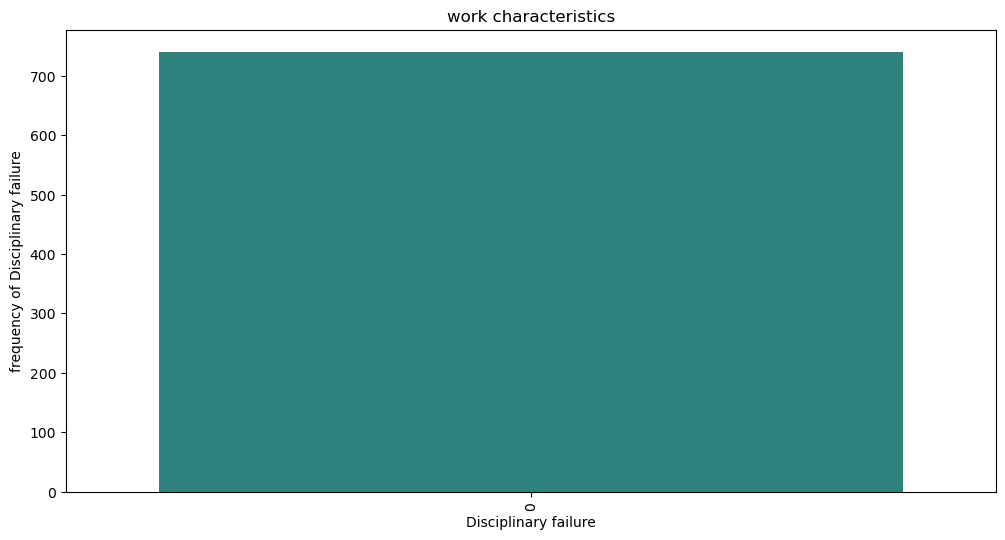


    Interpretation:
                    This charts shows how work characteristics vary across Disciplinary failure 
    

-----------------------------------------------------------------------------------------------


Renamed Column:
 | Hit target   | frequency of Hit target   |
|:-------------|:--------------------------|
| 93           | 105                       |
| 99           | 102                       |
| 97           | 89                        |


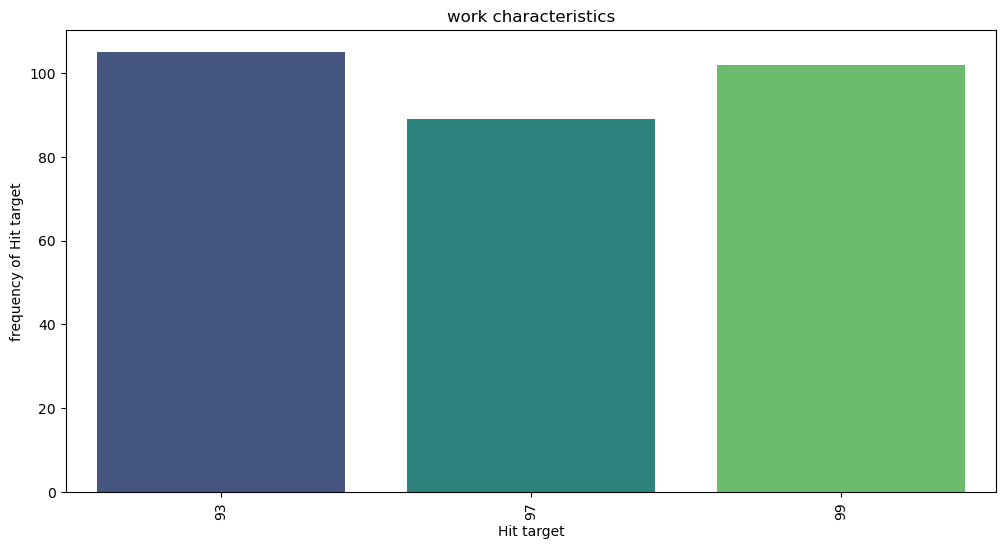


    Interpretation:
                    This charts shows how work characteristics vary across Hit target 
    

-----------------------------------------------------------------------------------------------


Renamed Column:
 | Work load Average/day    | frequency of Work load Average/day    |
|:-------------------------|:--------------------------------------|
| 222.196                  | 36                                    |
| 264.249                  | 33                                    |
| 368.962                  | 32                                    |


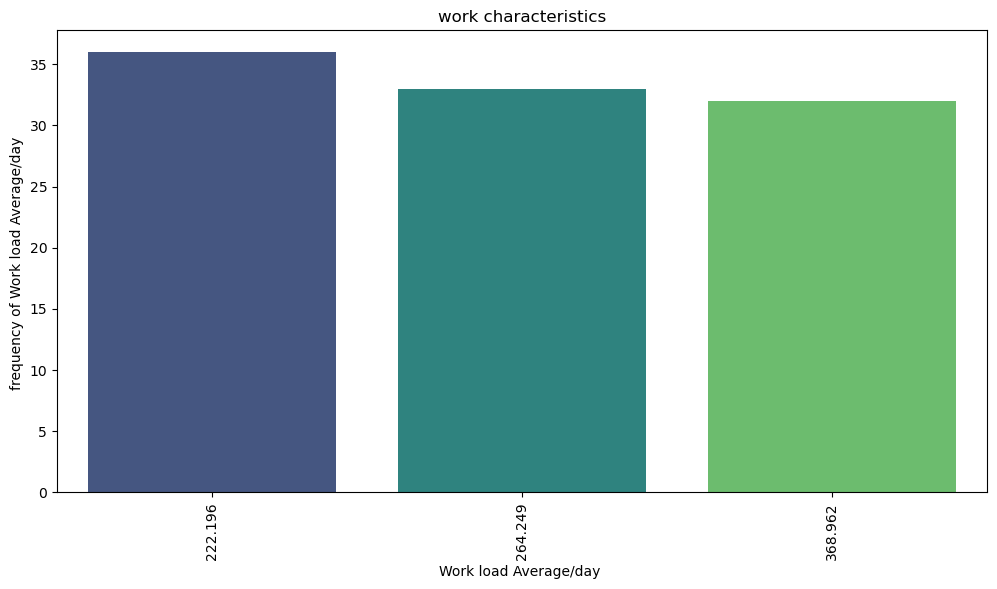


    Interpretation:
                    This charts shows how work characteristics vary across Work load Average/day  
    

-----------------------------------------------------------------------------------------------



In [9]:

t2=['Disciplinary failure', 'Hit target','Work load Average/day ']
for i in t2:
    work=(df.groupby(i)[i].value_counts()).sort_values(ascending=False)
    work_=work.head(3)
    _work_ = work_.rename(f'frequency of {i}')
    print("\nRenamed Column:\n", _work_.to_markdown(numalign="left", stralign="left"))
    z=pd.DataFrame(_work_ )
    plt.figure(figsize=(12, 6))
    sns.barplot(x=z.index, y=z[f'frequency of {i}'], palette='viridis')
    plt.xlabel(i)
    plt.ylabel(f'frequency of {i}')
    plt.title('work characteristics')
    plt.xticks(rotation=90)
    plt.show()
    print(f'''
    Interpretation:
                    This charts shows how work characteristics vary across {i} 
    ''')
    print('\n-----------------------------------------------------------------------------------------------\n')

In [10]:
df['Age']

0      33.0
1      50.0
2      38.0
3      39.0
4      33.0
       ... 
735    33.0
736    37.0
737    40.0
738    39.0
739    53.0
Name: Age, Length: 740, dtype: float64

Top 3 frequent reasons for employee absence:
 Reason for absence
23.0    149
28.0    112
27.0     69
Name: count, dtype: int64


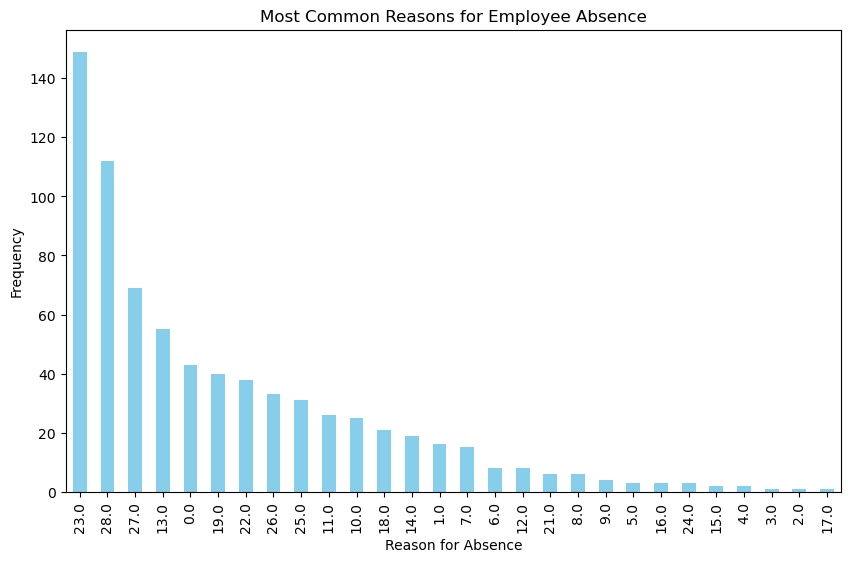


Interpretation:
                The most common reasons for employee absence are 23, 28, and 27.
                        - 23 stands for Medical Consultation, 
                        - 28 stands for Dental Consultation, 
                        - And 27 stands for Physiotherapy.



In [11]:
"""Task - 3: Analyzing Reasons for Absenteeism
What are the most frequent reasons for employee absence? Are there any pattern in these reasons?
Perform descriptive analysis to find the answer to the above question."""

reason_counts = df['Reason for absence'].value_counts()
print(f"Top 3 frequent reasons for employee absence:\n {reason_counts.head(3)}")

plt.figure(figsize=(10, 6))
reason_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Reason for Absence')
plt.ylabel('Frequency')
plt.title('Most Common Reasons for Employee Absence')
plt.show()
print("""
Interpretation:
                The most common reasons for employee absence are 23, 28, and 27.
                        - 23 stands for Medical Consultation, 
                        - 28 stands for Dental Consultation, 
                        - And 27 stands for Physiotherapy.
""")

In [12]:
"""Task - 4: Predicting Absenteeism Duration
Can we predict the duration of an employee's absence based on factors like reason for absence, disciplinary failure distance from residence to work, obesity, etc.
Perform predictive analysis to forecast the duration of an employee's absence based on various factors mentioned above."""

"Task - 4: Predicting Absenteeism Duration\nCan we predict the duration of an employee's absence based on factors like reason for absence, disciplinary failure distance from residence to work, obesity, etc.\nPerform predictive analysis to forecast the duration of an employee's absence based on various factors mentioned above."

In [13]:
data=df.copy()
remove=['ID','Social drinker','Social smoker',"Education"]
data.drop(remove,axis=1,inplace=True)
data

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Son,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,26.0,7,3,1,289.0,36,13.0,33.0,239.554,97,0,2,1.0,90,172.0,30.0,4
1,0.0,7,3,1,118.0,13,18.0,50.0,239.554,97,0,1,0.0,98,176.5,31.0,0
2,23.0,7,4,1,179.0,51,18.0,38.0,239.554,97,0,0,0.0,89,170.0,31.0,2
3,7.0,7,5,1,279.0,5,14.0,39.0,239.554,97,0,2,0.0,68,168.0,24.0,4
4,23.0,7,5,1,289.0,36,13.0,33.0,239.554,97,0,2,1.0,90,172.0,30.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,14.0,7,3,1,289.0,36,13.0,33.0,264.604,93,0,2,1.0,90,172.0,30.0,8
736,11.0,7,3,1,235.0,11,14.0,37.0,264.604,93,0,1,1.0,88,172.0,29.0,4
737,0.0,0,3,1,118.0,14,13.0,40.0,271.219,95,0,1,2.5,98,170.0,34.0,0
738,0.0,0,4,2,231.0,35,14.0,39.0,271.219,95,0,2,2.0,100,170.0,35.0,0


In [14]:
cols= data.columns
scaler= StandardScaler()
scaled= scaler.fit_transform(data)
df_scaled= pd.DataFrame(scaled, columns=cols)
df_scaled

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Son,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,0.804938,0.196763,-0.643947,-1.390175,1.012777,0.429556,0.107066,-0.537549,-0.830594,0.681528,0.0,0.893723,0.465851,0.851673,0.333508,0.775932,-0.233397
1,-2.280124,0.196763,-0.643947,-1.390175,-1.545473,-1.121694,1.263697,2.149126,-0.830594,0.681528,0.0,-0.017234,-0.702725,1.473056,1.862181,1.009438,-1.123676
2,0.448970,0.196763,0.059924,-1.390175,-0.632881,1.441240,1.263697,0.252650,-0.830594,0.681528,0.0,-0.928191,-0.702725,0.774000,-0.345902,1.009438,-0.678537
3,-1.449530,0.196763,0.763796,-1.390175,0.863172,-1.661258,0.338393,0.410690,-0.830594,0.681528,0.0,0.893723,-0.702725,-0.857131,-1.025313,-0.625100,-0.233397
4,0.448970,0.196763,0.763796,-1.390175,1.012777,0.429556,0.107066,-0.537549,-0.830594,0.681528,0.0,0.893723,0.465851,0.851673,0.333508,0.775932,-0.678537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,-0.618937,0.196763,-0.643947,-1.390175,1.012777,0.429556,0.107066,-0.537549,-0.170828,-0.525727,0.0,0.893723,0.465851,0.851673,0.333508,0.775932,0.656881
736,-0.974905,0.196763,-0.643947,-1.390175,0.204909,-1.256585,0.338393,0.094610,-0.170828,-0.525727,0.0,-0.017234,0.465851,0.696327,0.333508,0.542427,-0.233397
737,-2.280124,-1.841698,-0.643947,-1.390175,-1.545473,-1.054248,0.107066,0.568729,0.003397,0.077901,0.0,-0.017234,2.218715,1.473056,-0.345902,1.709954,-1.123676
738,-2.280124,-1.841698,0.059924,-0.490149,0.145067,0.362110,0.338393,0.410690,0.003397,0.077901,0.0,0.893723,1.634427,1.628402,-0.345902,1.943459,-1.123676


In [15]:
ss=df[['Social drinker','Social smoker']]
df_scaled=pd.concat([df_scaled,ss],axis=1)
df_scaled

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Son,Pet,Weight,Height,Body mass index,Absenteeism time in hours,Social drinker,Social smoker
0,0.804938,0.196763,-0.643947,-1.390175,1.012777,0.429556,0.107066,-0.537549,-0.830594,0.681528,0.0,0.893723,0.465851,0.851673,0.333508,0.775932,-0.233397,1.0,0
1,-2.280124,0.196763,-0.643947,-1.390175,-1.545473,-1.121694,1.263697,2.149126,-0.830594,0.681528,0.0,-0.017234,-0.702725,1.473056,1.862181,1.009438,-1.123676,1.0,0
2,0.448970,0.196763,0.059924,-1.390175,-0.632881,1.441240,1.263697,0.252650,-0.830594,0.681528,0.0,-0.928191,-0.702725,0.774000,-0.345902,1.009438,-0.678537,1.0,0
3,-1.449530,0.196763,0.763796,-1.390175,0.863172,-1.661258,0.338393,0.410690,-0.830594,0.681528,0.0,0.893723,-0.702725,-0.857131,-1.025313,-0.625100,-0.233397,1.0,0
4,0.448970,0.196763,0.763796,-1.390175,1.012777,0.429556,0.107066,-0.537549,-0.830594,0.681528,0.0,0.893723,0.465851,0.851673,0.333508,0.775932,-0.678537,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,-0.618937,0.196763,-0.643947,-1.390175,1.012777,0.429556,0.107066,-0.537549,-0.170828,-0.525727,0.0,0.893723,0.465851,0.851673,0.333508,0.775932,0.656881,1.0,0
736,-0.974905,0.196763,-0.643947,-1.390175,0.204909,-1.256585,0.338393,0.094610,-0.170828,-0.525727,0.0,-0.017234,0.465851,0.696327,0.333508,0.542427,-0.233397,0.0,0
737,-2.280124,-1.841698,-0.643947,-1.390175,-1.545473,-1.054248,0.107066,0.568729,0.003397,0.077901,0.0,-0.017234,2.218715,1.473056,-0.345902,1.709954,-1.123676,1.0,0
738,-2.280124,-1.841698,0.059924,-0.490149,0.145067,0.362110,0.338393,0.410690,0.003397,0.077901,0.0,0.893723,1.634427,1.628402,-0.345902,1.943459,-1.123676,1.0,0


In [16]:
# Extract the last row index
last_row= len(df_scaled)-1

# Extract the last row using iloc and store in a new DataFrame
validation= df_scaled.iloc[last_row]
validation
# Reshape the extracted Series into a DataFrame (optional)
new_data_df= validation.to_frame().transpose()
new_data_df

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Son,Pet,Weight,Height,Body mass index,Absenteeism time in hours,Social drinker,Social smoker
739,-2.280124,-1.841698,1.467667,0.409877,-0.632881,1.036566,0.338393,2.623245,0.003397,0.077901,0.0,-0.017234,0.465851,-0.158075,1.352623,-0.391595,-1.123676,0.0,0.0


In [17]:
#Extract original data except the new data
# Retrieve original data by excluding new data
df_scaled= df_scaled.iloc[:-1]
df_scaled

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Son,Pet,Weight,Height,Body mass index,Absenteeism time in hours,Social drinker,Social smoker
0,0.804938,0.196763,-0.643947,-1.390175,1.012777,0.429556,0.107066,-0.537549,-0.830594,0.681528,0.0,0.893723,0.465851,0.851673,0.333508,0.775932,-0.233397,1.0,0
1,-2.280124,0.196763,-0.643947,-1.390175,-1.545473,-1.121694,1.263697,2.149126,-0.830594,0.681528,0.0,-0.017234,-0.702725,1.473056,1.862181,1.009438,-1.123676,1.0,0
2,0.448970,0.196763,0.059924,-1.390175,-0.632881,1.441240,1.263697,0.252650,-0.830594,0.681528,0.0,-0.928191,-0.702725,0.774000,-0.345902,1.009438,-0.678537,1.0,0
3,-1.449530,0.196763,0.763796,-1.390175,0.863172,-1.661258,0.338393,0.410690,-0.830594,0.681528,0.0,0.893723,-0.702725,-0.857131,-1.025313,-0.625100,-0.233397,1.0,0
4,0.448970,0.196763,0.763796,-1.390175,1.012777,0.429556,0.107066,-0.537549,-0.830594,0.681528,0.0,0.893723,0.465851,0.851673,0.333508,0.775932,-0.678537,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
734,-0.737593,0.196763,-1.347819,-1.390175,2.209619,-0.851911,-0.124260,-0.853628,-0.170828,-0.525727,0.0,1.804680,-0.702725,-0.701785,-0.685607,-0.391595,2.660009,1.0,0
735,-0.618937,0.196763,-0.643947,-1.390175,1.012777,0.429556,0.107066,-0.537549,-0.170828,-0.525727,0.0,0.893723,0.465851,0.851673,0.333508,0.775932,0.656881,1.0,0
736,-0.974905,0.196763,-0.643947,-1.390175,0.204909,-1.256585,0.338393,0.094610,-0.170828,-0.525727,0.0,-0.017234,0.465851,0.696327,0.333508,0.542427,-0.233397,0.0,0
737,-2.280124,-1.841698,-0.643947,-1.390175,-1.545473,-1.054248,0.107066,0.568729,0.003397,0.077901,0.0,-0.017234,2.218715,1.473056,-0.345902,1.709954,-1.123676,1.0,0


In [18]:
abs(df_scaled.corr())>.7


,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Son,Pet,Weight,Height,Body mass index,Absenteeism time in hours,Social drinker,Social smoker
Reason for absence,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Month of absence,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Day of the week,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Seasons,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Transportation expense,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Distance from Residence to Work,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
Service time,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
Age,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
Work load Average/day,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
Hit target,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False


<Axes: >

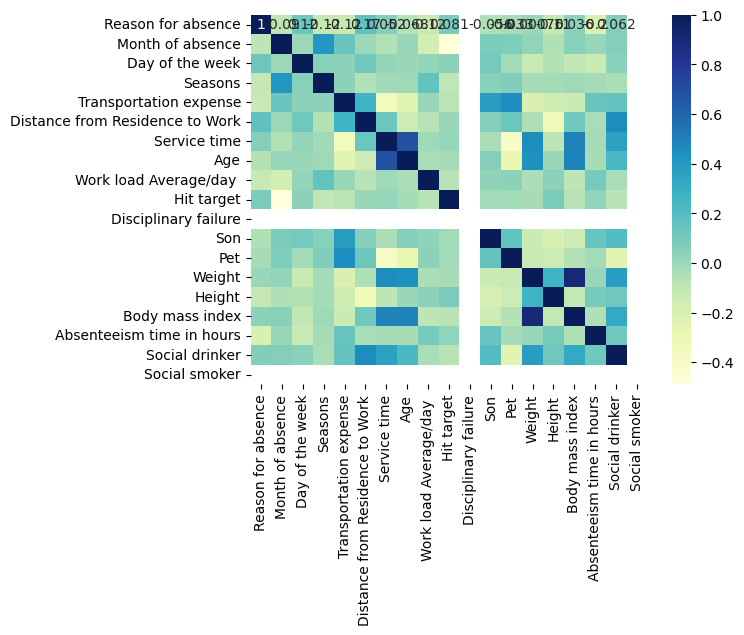

In [19]:
# Plotting heatmap
sns.heatmap(df_scaled.corr(), annot=True, cmap='YlGnBu')

In [20]:
a=['Social smoker']
df_scaled.drop(a,axis=1,inplace=True)
df_scaled

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Son,Pet,Weight,Height,Body mass index,Absenteeism time in hours,Social drinker
0,0.804938,0.196763,-0.643947,-1.390175,1.012777,0.429556,0.107066,-0.537549,-0.830594,0.681528,0.0,0.893723,0.465851,0.851673,0.333508,0.775932,-0.233397,1.0
1,-2.280124,0.196763,-0.643947,-1.390175,-1.545473,-1.121694,1.263697,2.149126,-0.830594,0.681528,0.0,-0.017234,-0.702725,1.473056,1.862181,1.009438,-1.123676,1.0
2,0.448970,0.196763,0.059924,-1.390175,-0.632881,1.441240,1.263697,0.252650,-0.830594,0.681528,0.0,-0.928191,-0.702725,0.774000,-0.345902,1.009438,-0.678537,1.0
3,-1.449530,0.196763,0.763796,-1.390175,0.863172,-1.661258,0.338393,0.410690,-0.830594,0.681528,0.0,0.893723,-0.702725,-0.857131,-1.025313,-0.625100,-0.233397,1.0
4,0.448970,0.196763,0.763796,-1.390175,1.012777,0.429556,0.107066,-0.537549,-0.830594,0.681528,0.0,0.893723,0.465851,0.851673,0.333508,0.775932,-0.678537,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
734,-0.737593,0.196763,-1.347819,-1.390175,2.209619,-0.851911,-0.124260,-0.853628,-0.170828,-0.525727,0.0,1.804680,-0.702725,-0.701785,-0.685607,-0.391595,2.660009,1.0
735,-0.618937,0.196763,-0.643947,-1.390175,1.012777,0.429556,0.107066,-0.537549,-0.170828,-0.525727,0.0,0.893723,0.465851,0.851673,0.333508,0.775932,0.656881,1.0
736,-0.974905,0.196763,-0.643947,-1.390175,0.204909,-1.256585,0.338393,0.094610,-0.170828,-0.525727,0.0,-0.017234,0.465851,0.696327,0.333508,0.542427,-0.233397,0.0
737,-2.280124,-1.841698,-0.643947,-1.390175,-1.545473,-1.054248,0.107066,0.568729,0.003397,0.077901,0.0,-0.017234,2.218715,1.473056,-0.345902,1.709954,-1.123676,1.0


In [21]:
# To show the correlation values from most negatively correlated to the most positively correlated.
df_scaled.corr()[['Absenteeism time in hours']].sort_values(by='Absenteeism time in hours',ascending=False)


,Absenteeism time in hours
Absenteeism time in hours,1.000000
Son,0.144028
Transportation expense,0.140421
Social drinker,0.117193
Work load Average/day,0.098259
Height,0.095217
Hit target,0.023040
Weight,0.007563
Month of absence,0.005830
Pet,-0.027313


Mean Squared Error: 1.0226922940621392
Mean Absolute Error: 0.8576376587578494
Root Mean Squared Error: 1.0112824996320955
R-squared: -0.0023101541219694433


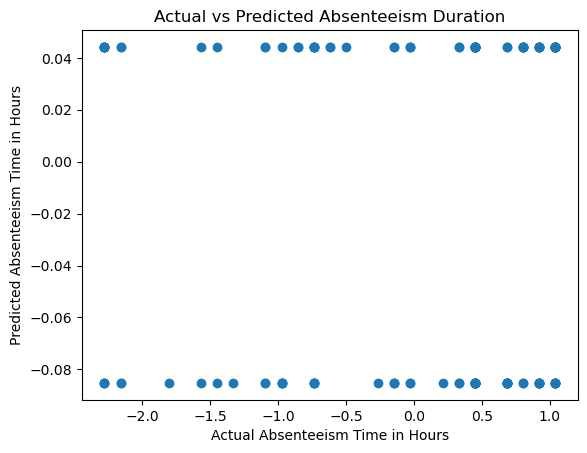

In [22]:
X = df_scaled[['Social drinker']]
y = df_scaled['Reason for absence']

# Splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predicting the test data
y_pred = model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse= mse**0.5

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print("Root Mean Squared Error:", rmse)
print(f"R-squared: {r2}")

# Visualizing the predictions vs actual
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Absenteeism Time in Hours')
plt.ylabel('Predicted Absenteeism Time in Hours')
plt.title('Actual vs Predicted Absenteeism Duration')
plt.show()

In [23]:
def calculate_residuals(model, features, label):
    """
    Creates predictions on the features with the model and calculates residuals
    """
    predictions= model.predict(features)
    df_results= pd.DataFrame({'Actual': label, "Predicted": predictions })
    df_results['Residuals']= abs(df_results['Actual'])- abs(df_results['Predicted'])
    return df_results


In [24]:
 # call the function
calculate_residuals(model, X_test, y_test)

,Actual,Predicted,Residuals
81,0.448970,-0.085218,0.363752
158,-0.262968,-0.085218,0.177750
66,0.448970,0.044204,0.404765
599,0.686282,-0.085218,0.601064
334,-1.093562,0.044204,1.049357
...,...,...,...
220,-0.025655,0.044204,-0.018549
131,0.923595,-0.085218,0.838377
44,0.448970,0.044204,0.404765
70,0.448970,-0.085218,0.363752


In [25]:
def homoscedasticity_assumption(model, features, label):
    """
    Homoscedasticity: Assumes that the errors exhibit constant variance
    """
    df_results= calculate_residuals(model, features, label)
    plt.subplots(figsize=(15,8))
    ax= plt.subplot(111)
    plt.scatter(x= df_results.index, y= df_results.Residuals, alpha=0.5)
    plt.plot(np.repeat(0, df_results.index.max()), color= 'darkorange', linestyle= '--')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.title("Resiudal Plot")
    plt.xlabel('Index')
    plt.ylabel('Residuals')
    plt.show()

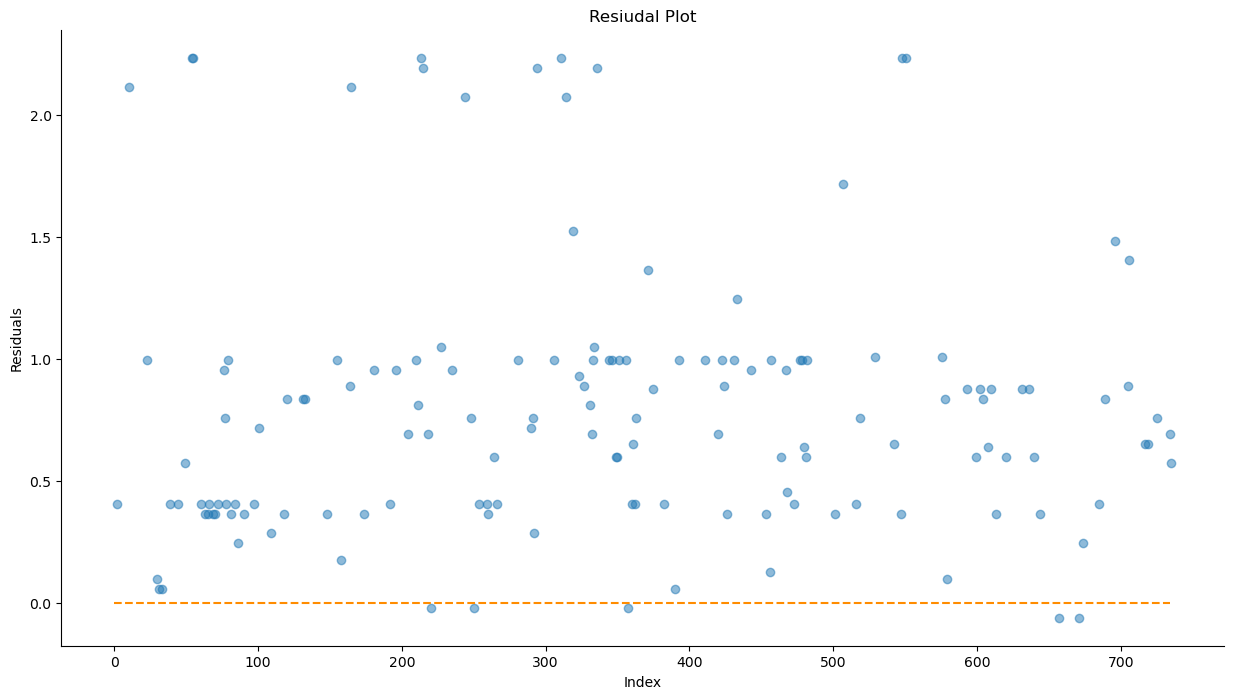

In [26]:
# call the function
homoscedasticity_assumption(model, X_test, y_test)

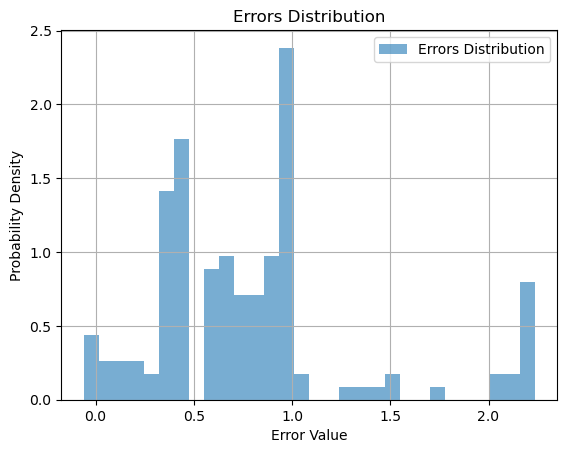

In [27]:
# Code to Error Normality curve
df_results = calculate_residuals(model, X_test, y_test)
plt.hist(df_results.Residuals, density=True, bins=30, alpha=0.6, label='Errors Distribution') # Plot errors
plt.xlabel('Error Value')
plt.ylabel('Probability Density')
plt.title('Errors Distribution')
plt.legend()
plt.grid(True)
plt.show()

Interpretation:
The KNN model achieves an overall high performance with an accuracy of 91.9%. The optimal K value is around 5, where the error rate minimizes and stabilizes. 